In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
df_customers = pd.read_csv("Data/Data/Data/churn-bigml-20.csv")
df_customers1 = pd.read_csv("Data/Data/Data/churn-bigml-80.csv")


In [3]:
#concate two dataframes
df_customers_final = pd.concat([df_customers, df_customers1], axis=0)

In [4]:
df_customers_final.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [16]:
# Check for duplicate index values
print(df_customers_final.index.duplicated().sum())  # This should return 0
df_customers_final.reset_index(drop=True, inplace=True)

667


In [17]:
# Encode categorical features
label_encoder = LabelEncoder()
df_customers_final['International plan'] = label_encoder.fit_transform(df_customers_final['International plan'])
df_customers_final['Voice mail plan'] = label_encoder.fit_transform(df_customers_final['Voice mail plan'])
# Select numerical features for clustering
X = df_customers_final.drop(columns=['State', 'Customer service calls'])
X = X.select_dtypes(include=[np.number])  # Keep only numerical columns
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

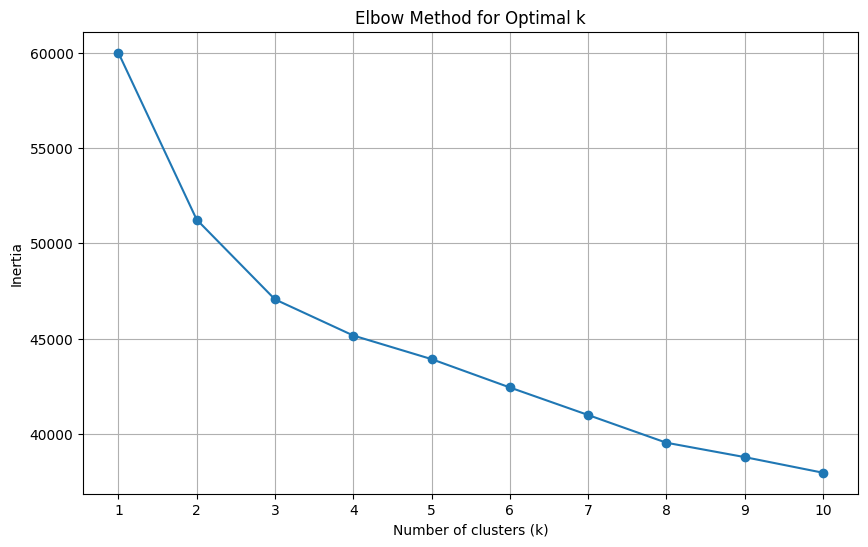

In [18]:
# Elbow method to find optimal k
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(K)
plt.grid()
plt.show()

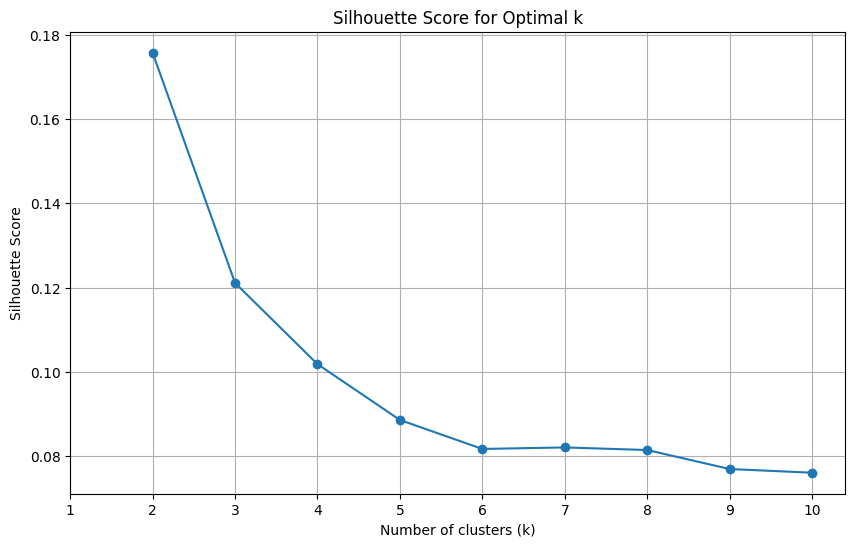

In [19]:
silhouette_scores = []

for k in K[1:]:  # Starting from k=2 for silhouette score
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K[1:], silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.xticks(K)
plt.grid()
plt.show()

In [20]:
#pply K-Means Clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_scaled)
df_customers_final['Cluster'] = kmeans.labels_

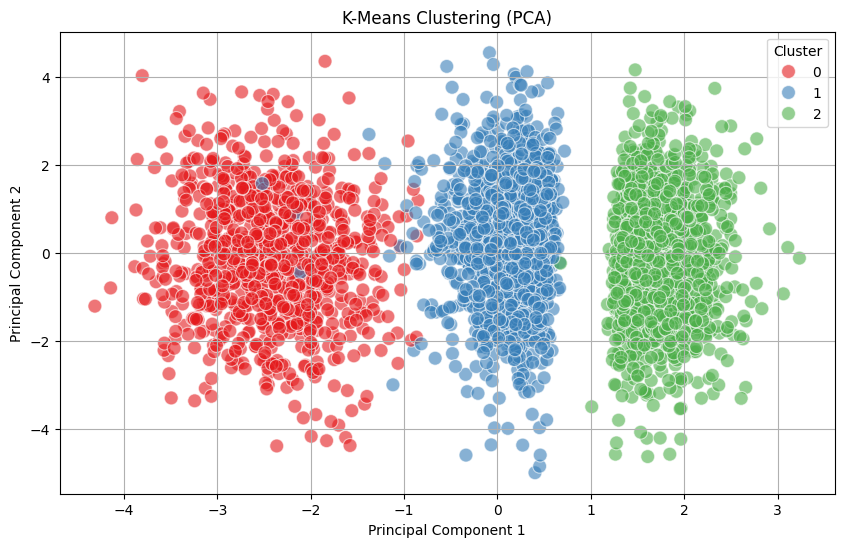

In [21]:
#Visualize Clusters in 2D Space Using PCA
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
df_pca['Cluster'] = df_customers_final['Cluster']

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=100, alpha=0.6)
plt.title('K-Means Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()